In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys 
sys.path.append("../src/RGE")


In [3]:
%run ../startup.py


📊 Plot style: using ps.apply_standard_formatting
✅ startup.py loaded: numpy, scipy, matplotlib, and project modules are ready.
   Use new_figure() to create pre-formatted plots.


In [4]:
# Instantiate the potential with the thermal table
V = veff.VeffRGE(vt_table_path="../VT_integralNumeric.dat")
# Example parameters
gD0 = 0.6
T = 0.385
S = np.linspace(0.0, 3, 1000)

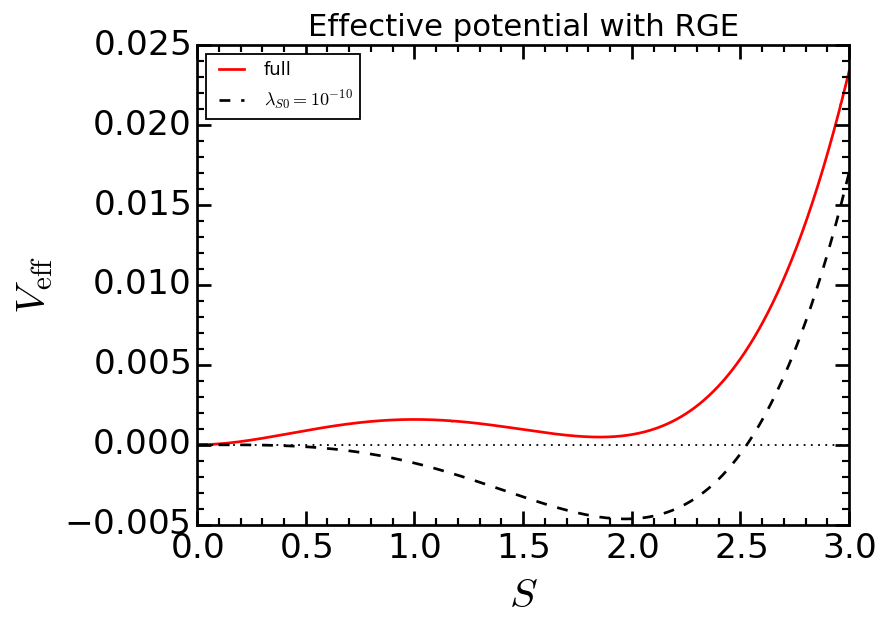

In [5]:


# Use new_figure (startup already wraps ps.apply_standard_formatting if available)
fig, ax = new_figure(figsize=(7, 5), dpi=130)
fig.patch.set_facecolor('white')

y_full = V.Veff(S, T, gD0, np.pi,1e-10)
y_ht   = V.Veff_HighT(S, T, gD0, np.pi,1e-10)
y_zero = V.Veff0_RGE(S, T, gD0, np.pi,1e-10)

# ax.plot(S, y_full, color='blue', 
#             linestyle=ps.linestyles["Full"], 
#             label=fr"Full, $\lambda_{{S0}}=-0.02$", lw=1.8)

ax.plot(S, y_full, color='red', 
             
            label=fr"full", lw=1.5)

ax.plot(S, y_zero, color='k', 
            label=fr"$\lambda_{{S0}}=10^{{-10}}$", lw=1.5,ls= '--')

# Apply your custom formatting
ps.apply_standard_formatting(ax,
                             xlabel=r"$S$",
                             ylabel=r"$V_{\rm eff}$",
                             title="Effective potential with RGE",
                            )
# === Zero reference line ===
ax.axhline(0, color="black", lw=1.0, linestyle=":")
# Order and clean the legend
plt.style.use('classic')
plt.legend(loc = 'best',ncol = 1,fontsize=10)

plt.tight_layout()
plt.show()




In [13]:
np.savetxt(
    "../data/raw_data/V_full_curve_gD06_mu_piT.dat",
    np.column_stack([S, y_full]),
    header="S_vals   V_full",
    fmt="%.10e")

In [172]:
gD0 = 0.5
T = 0.3
S1 = np.linspace(0.0, 1.66, 1000)
S2 = np.linspace(1.74, 3, 1000)

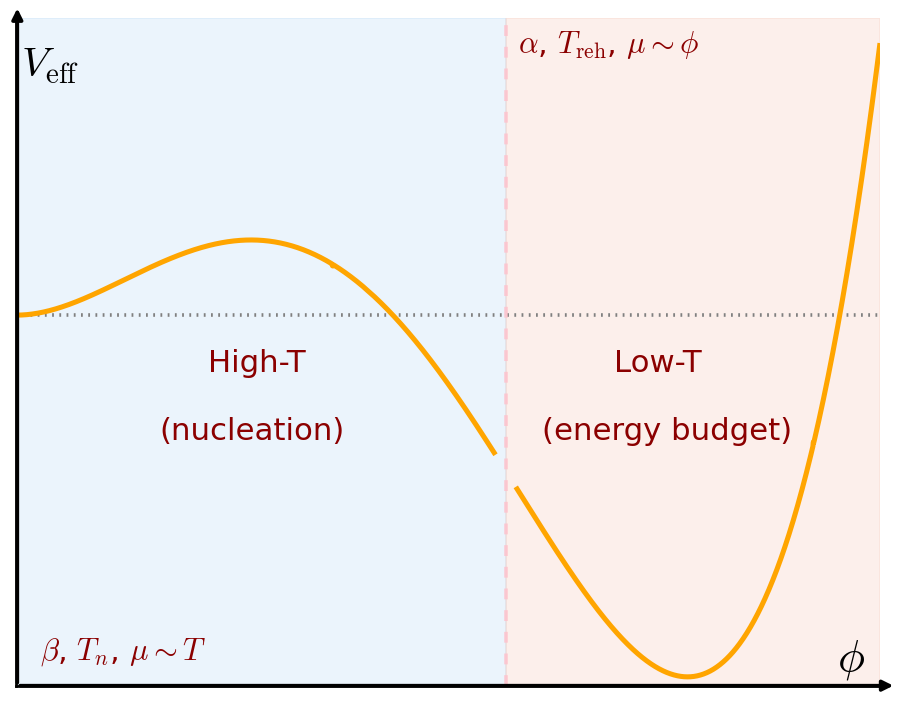

In [174]:
# ========================
# ESQUEMA Veff (versión cute)
# ========================

fig, ax = new_figure(figsize=(7, 5.5), dpi=130)
fig.patch.set_facecolor('white')

# === Potenciales ===
y_full1 = V.Veff(S1, T, gD0, np.pi, 1e-10)
y_full2 = V.Veff(S2, T, gD0, np.pi, 1e-10)

# === Frontera térmica (puedes moverla) ===
S_div =  1.7
idx_div = np.argmin(np.abs(S - S_div))



# === Fill between ===

ax.axvspan(S.min(), S_div, color="#B3D7F5", alpha=0.25, zorder=0)   # High-T
ax.axvspan(S_div, S.max(), color="#F5C3B3", alpha=0.25, zorder=0)   # Low-T


# === Línea horizontal de referencia ===
ax.axhline(0, color='gray', lw=2,
            linestyle=':')

# === Curvas ===
ax.plot(S1, 2*y_full1, color='orange', lw=2.8)
ax.plot(S2, 2*y_full2, color='orange', lw=2.8)




# === Línea punteada vertical (separa regímenes) ===
ax.axvline(S_div, color='pink', lw=2, ls=(0,(6,6)), alpha=0.8)


# === Anotaciones ===
ax.text(S1.mean()*0.8, -1.5*max(y_full1), "High-T", fontsize=17, color='darkred')
ax.text(S1.mean()*0.6, -3.3*max(y_full1), "(nucleation)", fontsize=17, color='darkred')
ax.text(S1.mean()*0.1, 1.9*min(y_full2),r"$\beta$, $T_n$, $\mu\sim T$", fontsize=17, color='darkred')



ax.text(S1.mean()*2.5, -1.5*max(y_full1), "Low-T", fontsize=17, color='darkred')
ax.text(S1.mean()*2.2, -3.3*max(y_full1), "(energy budget)", fontsize=17, color='darkred')
ax.text(S1.mean()*2.1, 7*max(y_full1),r"$\alpha$, $T_{\rm reh}$, $\mu\sim \phi$", fontsize=17, color='darkred')


ax.text(0.005, 0.9, r"$V_{\rm eff}$", transform=ax.transAxes, ha="left", va="bottom", fontsize=23)
ax.text(0.95, 0.007, r"$\phi$", transform=ax.transAxes, ha="left", va="bottom", fontsize=25)




# === Formato paper-friendly ===
ps.apply_standard_formatting(
    ax,
    xlabel=r"",
    ylabel=r"",
)

# === Limpieza para que se vea “esquemático” ===
ax.set_xticks([])
ax.set_yticks([])
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)



plt.tight_layout()
ax.annotate("", xy=(1.02, 0.001), xytext=(0, 0.001), xycoords="axes fraction",
            arrowprops=dict(arrowstyle="-|>", lw=2, color="k"), clip_on=False)
ax.annotate("", xy=(0.001, 1.02), xytext=(0.001, 0), xycoords="axes fraction",
            arrowprops=dict(arrowstyle="-|>", lw=2, color="k"), clip_on=False)



plt.savefig("../plots/RGE/HT_vs_LT.pdf", dpi=300, bbox_inches="tight", facecolor="white")